# Chapter 2 Basic Deep Learning


Including ： 深度神经网络基础结构，前向传播，后向传播，正则化，损失函数，激活函数，全连接层，卷积层，池化层。
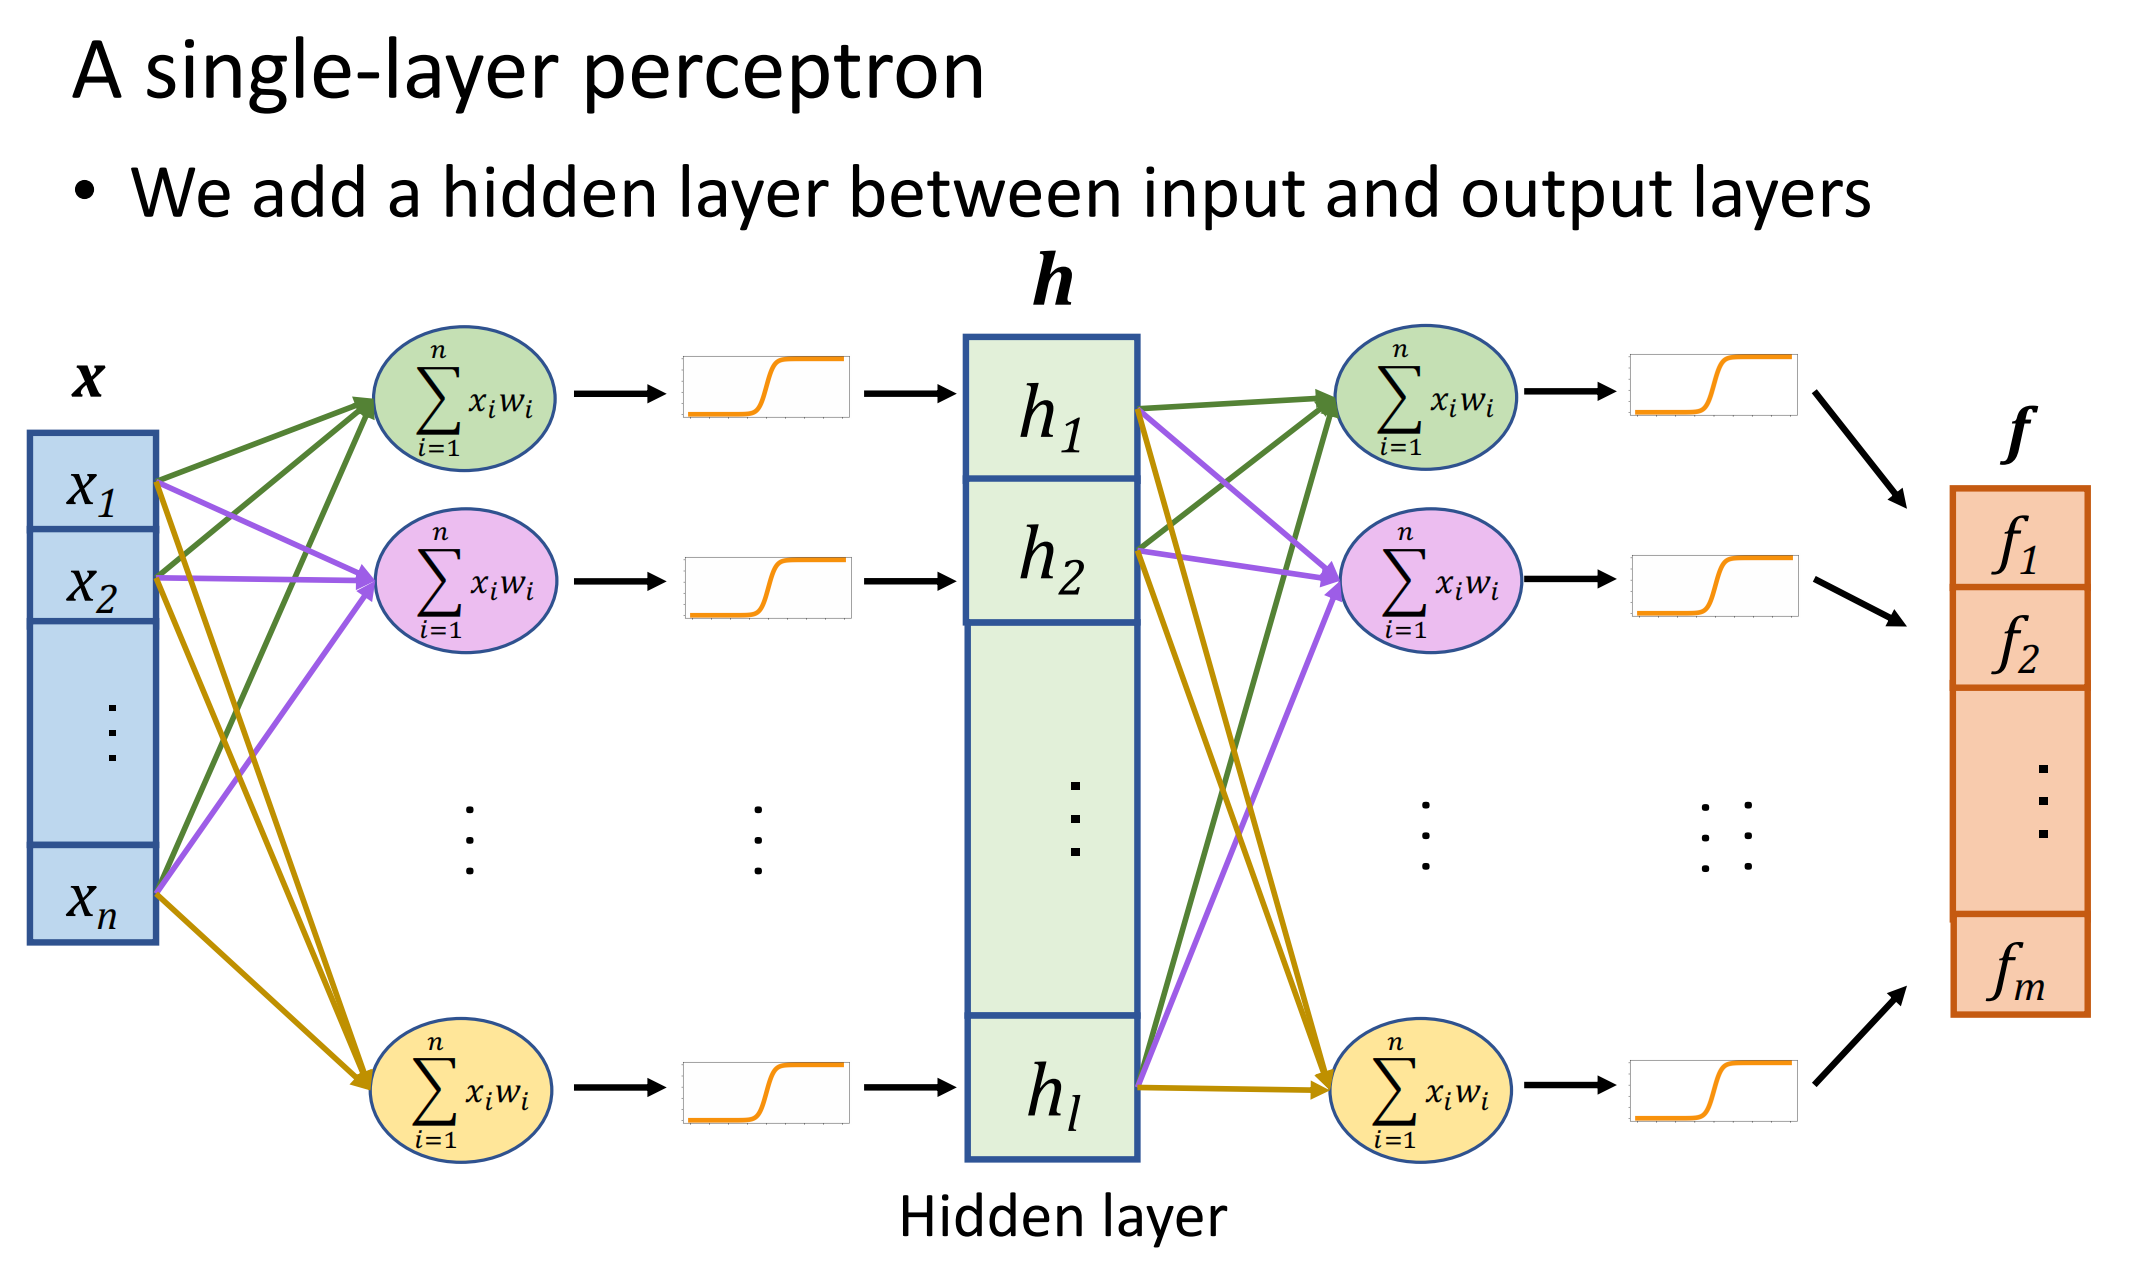

In [10]:
import torch 
import torch.nn as nn

# 1. DNN--Deep Neural Network
深度神经网络（DNN）是一种由多个层组成的神经网络，用于建模复杂的非线性关系。DNN的“深度”指的是网络中隐藏层的数量，这些隐藏层能够从原始输入数据中提取高层次的抽象特征。以下是DNN的详细介绍：

## 1. 结构

- **输入层（Input Layer）：** 这是网络的第一层，负责接收原始数据。在图像处理任务中，输入层的神经元数量通常与像素的数量相匹配。
  
- **隐藏层（Hidden Layers）：** 在输入层之后是一系列的隐藏层，它们是网络的核心。每个隐藏层由多个神经元组成，每个神经元都与前一层的每个神经元相连。这些连接都有权重，这些权重在训练过程中不断更新。

- **输出层（Output Layer）：** 最后一层是输出层，它的神经元数量与任务的需求相匹配。例如，在一个多类分类任务中，输出层的神经元数量通常等于类别的数量。

![img.png](attachment:15f5d12d-186e-4b0b-acf2-2aaae7c399aa.png)


## 2. 前向传播

- **线性变换：** 数据在每层通过加权求和和偏置项的形式进行线性变换。
  
- **激活函数：** 线性变换的结果会通过一个非线性激活函数，如ReLU（Rectified Linear Unit）、Sigmoid或Tanh。这个非线性性是DNN可以模拟复杂函数的关键。

## 3. 反向传播与优化

- **损失函数：** 在训练过程中，网络的预测结果和实际结果之间的差异通过损失函数计算。常用的损失函数包括均方误差、交叉熵等。

- **反向传播（Backpropagation）：** 通过损失函数计算梯度，并将这些梯度反向传播回网络，以更新权重和偏置。

- **优化器：** 优化算法，如梯度下降、Adam或RMSprop，用于在训练过程中更新网络的权重，以最小化损失函数。

## Backpropagation

反向传播算法是一个优化神经网络权重和偏置项的方法，目的是最小化网络的损失函数。算法包括两个过程：前向传播和反向传播。

### 反向传播的步骤：

1. **前向传播：**
   - 输入数据通过网络进行前向传播，每一层计算神经元的加权和，应用激活函数，直到输出层。

2. **计算损失：**
   - 在输出层计算预测值和实际值之间的损失（误差）。

3. **反向传播误差：**
   - 计算输出层的误差。
   - 计算每一层的梯度，这通常涉及到损失函数对每个权重的偏导数。
   - 通过链式法则逐层向后传播这些梯度。

4. **更新权重和偏置：**
   - 根据计算出的梯度以及选择的学习率更新网络中的权重和偏置。

### 简单例子：

假设我们有一个简单的神经网络，它只有一个输入 $\(x\)$，一个隐藏层神经元 $\(h\)$，和一个输出层神经元 $\(y\)$。隐藏层和输出层各有一个权重 $\(w_h\)$ 和 $\(w_y\)$，以及偏置 $\(b_h\)$ 和 $\(b_y\)$。我们使用均方误差作为损失函数，激活函数为ReLU。

1. **前向传播：**
   - 输入 $\(x=2\)$。
   - 隐藏层的计算：$\(h = ReLU(w_h \cdot x + b_h)\)$。
   - 输出层的计算：$\(y = ReLU(w_y \cdot h + b_y)\)$。

2. **计算损失：**
   - 真实输出值 $\(y_{true} = 3\)$。
   - 损失 $\(L = \frac{1}{2}(y - y_{true})^2\)$。

3. **反向传播误差：**
   - 输出层的梯度：$\( \frac{\partial L}{\partial y} = (y - y_{true})\)$。
   - 隐藏层的梯度：$\( \frac{\partial L}{\partial h} = \frac{\partial L}{\partial y} \cdot w_y \cdot 1_{h > 0}\)$。

4. **更新权重和偏置：**
   - 学习率 $\(\alpha = 0.01\)$。
   - 权重更新公式：$\[ w = w - \alpha \cdot (\text{gradient} \cdot \text{input}) \]$
   - 更新 $\(w_y\)：\(w_y := w_y - \alpha \cdot \frac{\partial L}{\partial y} \cdot h\)$。
   - 更新 $\(w_h\)：\(w_h := w_h - \alpha \cdot \frac{\partial L}{\partial h} \cdot x\)$。

在这个例子中，我们假设所有的激活函数输出都大于0（ReLU激活函数的输出），所以在计算梯度时乘的激活函数导数为1。在实际操作中，如果ReLU的输入小于等于0，则其导数为0，那么反向传播的梯度也会是0。

更新权重 $\( w \)$的标准梯度下降公式通常涉及到梯度与输入的乘积。如果我们将 $\( \text{gradient} \)$ 定义为损失函数关于权重的偏导数，则权重的更新可以表示为：

$$\[ w = w - \alpha \cdot (\text{gradient} \cdot \text{input}) \]$$

这里的“输入”可以是实际的输入数据（对于输入层权重的更新），也可以是前一层神经元的激活（对于隐藏层或输出层权重的更新）。这种形式确保了权重的调整是根据它对输出误差的贡献程度来进行的。

以一个具体的例子来说明，如果我们考虑一个隐藏层神经元的权重 \( w_h \) 的更新，我们会有：

$$\[ w_h = w_h - \alpha \cdot \frac{\partial L}{\partial h} \cdot x \]$$

其中：
- $\( \frac{\partial L}{\partial h} \)$ 是损失函数 $\( L \)$ 对隐藏层激活 $\( h \)$ 的偏导数。
- $\( x \)$ 是该权重对应的输入。

这意味着梯度与输入 $\( x \)$ 的乘积决定了权重 $\( w_h \)$ 调整的方向和大小。这样的更新规则是为了减少在当前权重配置下，网络的预测值与实际值之间的误差。

## 4. 正则化与防止过拟合

- **Dropout：** 随机丢弃一些神经元的输出，以增强网络的泛化能力。
  
- **权重正则化：** 向损失函数添加一个关于权重大小的项，如L1或L2正则化，以防止权重变得过大。

- **批量归一化（Batch Normalization）：** 对每个隐藏层的激活进行归一化处理，以加速训练。

## 5. Loss Functions
深度学习中的损失函数是用来衡量模型预测值与真实值之间差异的指标，是优化算法的目标函数。不同类型的问题和模型会选择不同的损失函数。以下是一些常见的深度学习损失函数：

1. **均方误差损失（Mean Squared Error, MSE）**:
 $$\( \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \)$$
   - 用途：回归问题
   - 描述：计算真实值 $\( y_i \)$ 与预测值 $\( \hat{y}_i \)$ 之间差的平方的平均值。对异常值比较敏感。

2. **均方根误差损失（Root Mean Squared Error, RMSE）**:
$$\( \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \)$$
   - 用途：回归问题
   - 描述：MSE的平方根，提高了对大误差的敏感性。

3. **平均绝对误差损失（Mean Absolute Error, MAE）**:
$$\( \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \)$$
   - 用途：回归问题
   - 描述：计算真实值与预测值之间差的绝对值的平均值，对异常值的敏感度低于MSE。

4. **交叉熵损失（Cross-Entropy Loss）**:

二分类：$$\( \text{CE} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] \)$$
多分类：$$\( \text{CE} = -\frac{1}{n} \sum_{i=1}^{n} \sum_{c=1}^{M} y_{i,c} \log(\hat{y}_{i,c}) \)$$
   - 用途：分类问题
   - 描述：衡量两个概率分布之间的差异，适用于二分类和多分类问题。对于正确分类的预测，惩罚较小；对于错误分类的预测，惩罚较大。

5. **对数损失（Log Loss）**:
$$\( \text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] \)$$
   - 用途：二分类问题
   - 描述：是交叉熵损失的二分类版本，用于衡量两个概率分布之间的差异。


选择合适的损失函数对于模型的训练效果和性能至关重要。在实际应用中，可能需要根据具体问题和数据的特性来选择或定制损失函数。

## 6. Activation Functions
激活函数是神经网络中的非线性函数，用于在每一层的输出上引入非线性性。以下是一些常见的激活函数：

### Sigmoid函数

- **公式**:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- **特点**:
  - 将输入值压缩到0和1之间。
  - 通常用于二分类问题的输出层。
  - 容易导致梯度消失问题，不适合用于深层网络的隐藏层。

### Tanh函数（双曲正切函数）

$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

- **特点**:
  - 将输入值压缩到-1和1之间。
  - 相比Sigmoid函数，其输出以0为中心，有助于数据的平滑传递，但同样存在梯度消失问题。

### ReLU函数（线性整流函数）

$$
\text{ReLU}(x) = \max(0, x)
$$

- **特点**:
  - 非负输入保持不变，负输入置为0。
  - 在实际应用中非常受欢迎，能够加速收敛，减少计算复杂度。
  - 存在死亡ReLU问题，即部分神经元可能永久不激活。

### Leaky ReLU函数

$$
\text{Leaky ReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha x, & \text{otherwise} \end{cases}
$$

- **特点**:
  - 对于负输入，有一个很小的正斜率\( \alpha \)（例如0.01），以避免死亡ReLU问题。
  - 在某些情况下比ReLU表现更好。

### Softmax函数

$$
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

- **特点**:
  - 用于多分类问题的输出层。
  - 将输出转换为概率分布。

这些激活函数根据不同的需求和网络结构被应用于深度学习模型中，以帮助模型学习非线性关系。

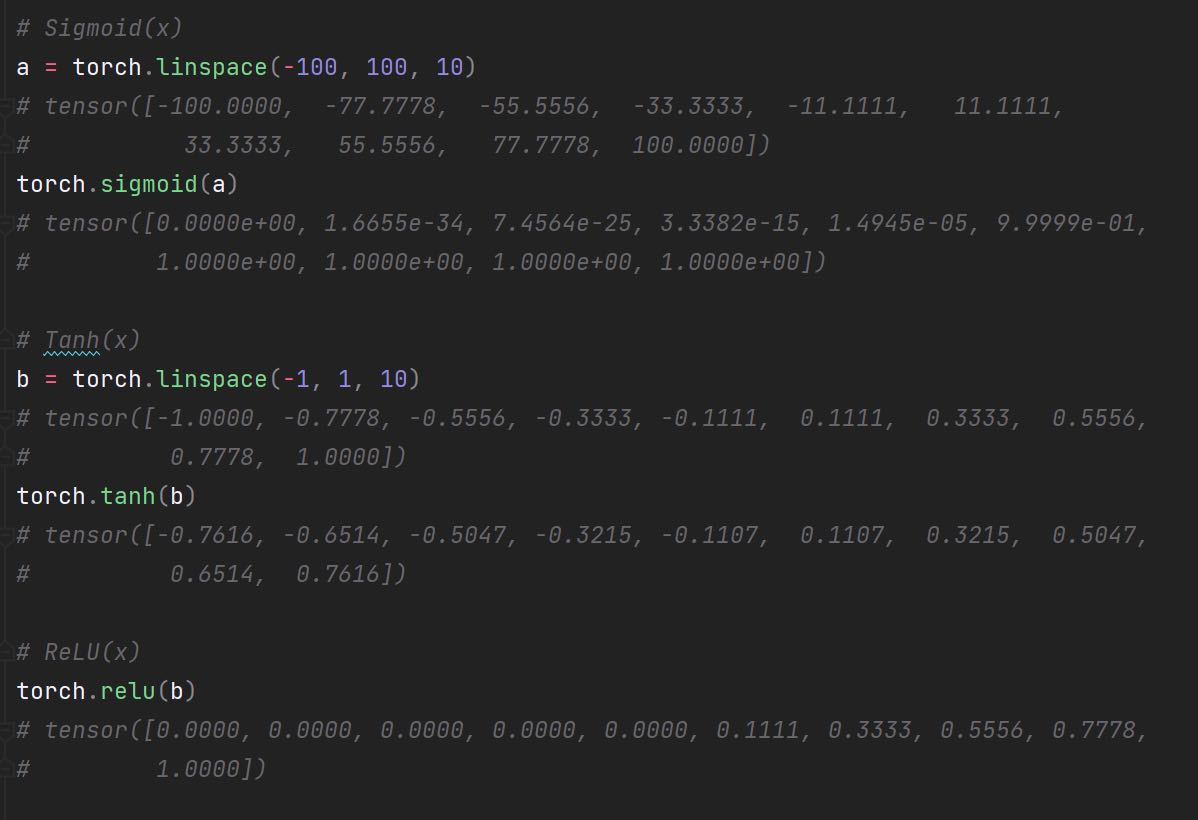

## 7. Different Layers
在深度学习中，不同类型的层用于处理不同性质的数据和学习任务。以下是几种常见层的定义和用途：

1. **密集层（Dense Layer）/全连接层（Fully Connected Layer）:**
   - **定义：** 每个输入节点都与下一层的每个激活单元相连。每个连接都有相应的权重。
   - **用途：** 密集层通常用于学习输入数据中的非空间层级特征。在许多网络中，它们经常用作输出层，用于分类和回归任务。
   - 通常作为模型的最后一层，用于产生最终的输出。这个输出可以是分类标签、回归值或其他形式的预测结果，取决于任务类型。


2. **卷积层（Convolutional Layer）:**
   - **定义：** 利用卷积核（也称为滤波器）在输入数据上滑动，提取局部特征。每个卷积核学习数据的不同特征。
   - **用途：** 卷积层主要用于图像数据，可以有效地学习空间层级的特征，如边缘、角落和其他视觉模式。
   - 一般用于中间层，用于提取图像数据的空间特征。

3. **池化层（Pooling Layer）:**
   - **定义：** 通常跟在卷积层后面，进行下采样操作，减少数据的空间维度，降低计算复杂性，并且提高特征检测器的空间不变性。
   - **用途：** 池化层通过减少参数数量和计算量来防止过拟合，常见的有最大池化和平均池化。
   - 一般用于中间层，用于减少数据的空间维度。

4. **递归层（Recurrent Layer）/循环神经网络层（Recurrent Neural Network Layer）:**
   - **定义：** 这类层拥有记忆功能，可以处理序列数据，每个时间点的输出不仅取决于当前的输入，还取决于之前的输入。
   - **用途：** 递归层适用于时间序列分析、自然语言处理等领域，如语音识别、语言建模和机器翻译。
   - 一般用于中间层，用于处理序列数据。

5. **正规化层（Normalization Layer）:**
   - **定义：** 正规化层对上一层的激活进行标准化处理，使网络的训练更稳定快速。
   - **用途：** 它们在训练过程中被用来提高模型的泛化能力，减少训练时间，并防止过拟合。
   - 一般用于中间层，用于提高模型的泛化能力。
6. **丢弃层（Dropout Layer）:**
   - **定义：** 在训练过程中随机地丢弃（即设为零）一部分神经元的输出，以避免网络对数据的过度拟合。
   - **用途：** Dropout 层是一种正则化技术，它强迫网络的冗余表达能力，从而提高模型的泛化性。
      
这些层可以组合使用，形成复杂的神经网络结构，以解决各种机器学习任务。

### Fully Connected Layer 全连接层
全连接层是神经网络中最基本的层，也是最常用的层。全连接层的每个神经元都与上一层的所有神经元相连，因此也称为密集层（Dense Layer）。全连接层的输入是一个向量，输出也是一个向量，输出的维度取决于该层神经元的数量。

`torch.nn.Linear(in_features, out_features, bias=True)`
- in_features：输入特征维度
- out_features：输出特征维度
- bias：是否使用偏置，默认使用

nn.Linear()的输入和输出都是二维张量，一般形状为[batch_size, size]，其中batch_size表示输入样本的数量，size表示每个样本的特征维度。该层的输出形状为[batch_size, out_features]。该函数使用线性变换：$y = xA^T + b$，其中$A$和$b$分别是该层的权重和偏置，$x$是该层的输入。

#### 计算公式
对于 `nn.Linear(m, n)` 这个层，它的权重矩阵的维度是 `(n, m)`，偏置向量的维度是 `(n,)`。这里的 `m` 和 `n` 分别对应于输入特征和输出特征的维度。
$$\[ \text{output} = \text{tensor} \times \text{weights}^T + \text{bias} \]$$

其中：
- `tensor` 是输入张量，维度为 `(1, m)`。
- `weights` 是权重矩阵，维度为 `(n, m)`。
- `bias` 是偏置向量，维度为 `(n,)`。
- 输出 `output` 的维度为 `(1, n)`。

在 PyTorch 中，这个过程是自动完成的，你不需要手动进行矩阵乘法和加偏置。当你调用 `layer(tensor)` 时，PyTorch 会自动执行这些操作并给出输出。

要注意的是，由于权重和偏置是在层初始化时随机生成的（除非你手动设置了固定的值），每次运行程序时得到的输出可能会有所不同。在你提供的代码中，通过设置随机数种子 `torch.manual_seed(0)`，确保了每次运行时权重和偏置的初始值是相同的，从而保证了输出的一致性。

In [12]:
# FCL示例

# 设置随机数种子
torch.manual_seed(0)
# 创建一个全连接层，输入特征维度为4，输出特征维度为3
layer = nn.Linear(4, 3)
# 创建一个4维的输入张量
tensor = torch.FloatTensor([[1, 2, 3, 4]])
# 通过全连接层得到输出
output = layer(tensor)
print(output) 

# 输入size：[1, 4]、
# 输出size：[1, 3]、

tensor([[-2.6514,  1.3005, -0.8323]], grad_fn=<AddmmBackward0>)


### Convolutional Layer 卷积层

卷积层是神经网络中用于处理图像数据的重要层，它通过卷积操作从图像中提取特征。在卷积层中，每个神经元不是连接到上一层的所有神经元，而是仅连接到输入中的一个局部区域，这个连接的局部区域称为卷积核或滤波器。多个卷积核允许网络同时学习多个特征。

`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)`
- `in_channels`：输入数据的通道数，例如彩色图像的通道数为3（RGB）。
- `out_channels`：卷积层中卷积核（滤波器）的数量，这也决定了输出数据的通道数。
- `kernel_size`：卷积核的大小，可以是一个整数或者由两个整数构成的元组，分别代表卷积核的高度和宽度。若为n则表示卷积核的高度和宽度都为n；若为(n, m)则表示卷积核的高度为n，宽度为m。
- `stride`：卷积时的步长，决定了卷积核滑动的距离，可以是一个整数或者由两个整数构成的元组，分别代表在高度和宽度方向上的步长。默认为1。
- `padding`：在输入数据周围添加的零填充的层数，可以是一个整数或者由两个整数构成的元组，分别代表在高度和宽度方向上的填充。默认为0。
- `dilation`：卷积核中元素之间的间距，用于定义膨胀卷积，可以增加感受野。默认为1。
- `groups`：控制输入和输出之间的连接方式，用于实现分组卷积。默认为1，表示标准卷积。
- `bias`：是否在卷积层的输出中添加偏置项。默认为True。

nn.Conv2d的输入是一个4维张量，形状为$[batch_size, inchannels, height, width]$，其中batch_size表示批处理中的样本数量，in_channels表示输入通道数，height和width表示图像的高度和宽度。输出也是一个4维张量，形状为[batch_size, out_channels, output_height, output_width]，其中output_height和output_width取决于卷积层的参数（如kernel_size、stride、padding等）和输入尺寸。

卷积操作本质上是在输入图像的局部区域上应用滤波器，通过滑动卷积核并计算点乘和来提取特征。每个卷积核负责检测输入中的某种特定模式或特征，多个卷积核允许网络学习多种特征。

#### 计算公式
对于每个维度（宽度和高度），输出大小（`output_size`）可以通过以下公式计算：

$$\[ \text{output\_size} = \left\lfloor \frac{\text{input\_size} + 2 \times \text{padding} - \text{dilation} \times (\text{kernel\_size} - 1) - 1}{\text{stride}} + 1 \right\rfloor \]$$

其中：
- `input_size` 是输入图像的尺寸（宽度或高度）。
- `padding` 是在输入图像边缘添加的零填充的层数。
- `dilation` 是卷积核中相邻元素之间的间距。当 `dilation=1` 时，表示没有膨胀，卷积核的元素是连续的。
- `kernel_size` 是卷积核的尺寸（宽度或高度）。
- `stride` 是卷积核移动的步长。
- 符号 `⌊ ⌋` 表示向下取整。


#### 代码示例

$\[ \text{output width} = \left( \frac{5 + 2 \times 0 - 2 - 1}{1} \right) + 1 = 3 \]$
$\[ \text{output height} = \left( \frac{5 + 2 \times 0 - 2 - 1}{1} \right) + 1 = 3 \]$

所以，每个输出特征图的大小是 $\(3 \times 3\)$。这个计算表明，当卷积核滑过输入图像时，由于没有填充来扩展图像的边缘，且步长为1，每个方向上的有效滑动次数是输入尺寸减去卷积核尺寸加1。因此，如果你有一个 $\(5 \times 5\)$ 的图像和一个 $\(3 \times 3\)$ 的卷积核，那么卷积核可以在每个方向上滑动 $\(5 - 3 + 1 = 3\)$ 次，产生一个 $\(3 \times 3\)$ 的输出特征图。

In [13]:
# 卷积层示例
# 设置随机数种子
torch.manual_seed(0)
# 创建一个卷积层，输入通道数为1，输出通道数为3，卷积核大小为3*3
layer = nn.Conv2d(1, 3, kernel_size=3)
# 创建一个4维的单通道（灰度）图像，图像大小为5*5: [1, 1, 5, 5]
tensor = torch.FloatTensor([[[[1, 2, 3, 4, 5],
                              [6, 7, 8, 9, 10],
                              [11, 12, 13, 14, 15],
                              [16, 17, 18, 19, 20],
                              [21, 22, 23, 24, 25]]]])
# 卷积
output = layer(tensor)
print(output) 
# 输入size：[1, 1, 5, 5]
# 输出size：[1, 3, 3, 3]
# 一个卷积层将一个单通道的 5×5 图像转换成了具有3个通道的 3×3 图像。这里的“通道”可以被理解为独立的特征图，每个特征图是由卷积层中的一个独立卷积核通过卷积操作从输入图像中提取的特征。

tensor([[[[ 0.2817,  0.1275, -0.0267],
          [-0.4894, -0.6437, -0.7979],
          [-1.2606, -1.4148, -1.5690]],

         [[-0.7577, -1.1682, -1.5788],
          [-2.8104, -3.2209, -3.6315],
          [-4.8631, -5.2736, -5.6842]],

         [[ 6.6946,  7.1855,  7.6765],
          [ 9.1493,  9.6402, 10.1312],
          [11.6040, 12.0949, 12.5859]]]], grad_fn=<ConvolutionBackward0>)


### Pooling Layer 池化层
池化层（Pooling Layer）是卷积神经网络（CNN）中常用的一种层，主要用于降低特征图的维度，减少计算量，同时保留重要信息。池化操作通过对输入特征图的局部区域进行下采样，从而减小特征图的尺寸。池化层通常跟在卷积层后面，用于减少卷积层输出的特征图的维度，使得网络对于输入的小变化更加不变（invariant），增强了网络的泛化能力。

#### 主要类型
池化层主要有两种类型：
1. **最大池化（Max Pooling）**：在输入特征图的局部区域中取最大值作为该区域的输出。最大池化有助于提取图像中的纹理和形状信息，是最常用的池化方式。
2. **平均池化（Average Pooling）**：计算输入特征图的局部区域中所有元素的平均值，并将该平均值作为输出。平均池化有助于平滑图像特征。

#### 参数
池化层的主要参数包括：
- **池化核大小（Kernel Size）**：池化操作覆盖的区域大小。常见的选择有2x2或3x3。
- **步长（Stride）**：池化窗口滑动的步长。如果步长等于池化核的大小，那么池化窗口不会重叠。
- **填充（Padding）**：在输入特征图的边缘添加的零填充的层数，用于控制输出特征图的大小。在池化操作中，填充不如在卷积操作中常用。

#### 作用
池化层的主要作用包括：
- **降维**：减少特征图的尺寸，从而减少后续层的参数数量和计算量，防止过拟合。
- **增强特征不变性**：通过池化操作，网络能够对输入图像中的小的变化（如平移、旋转等）更加鲁棒。
- **特征强化**：最大池化可以强化特征图中的显著特征，有助于模型捕捉关键信息。

#### 使用场景
池化层广泛应用于各种卷积神经网络架构中，尤其是在处理图像和视频数据时。在多层卷积和池化层的交替使用中，网络能够逐渐提取从低级到高级的特征，从而实现复杂任务的学习，如图像分类、物体检测和语义分割等。

#### 计算公式
池化层只会改变输入特征图的尺寸，不会改变通道数。即输入[batch_size, in_channels, height, width]，输出[batch_size, in_channels, output_height, output_width]。channels维度的大小保持不变，而height和width的大小取决于池化操作的参数（如kernel_size、stride、padding等）和输入尺寸。

对于每个维度（宽度和高度），输出大小（`output_size`）可以通过以下公式计算：

 $$\(output\_size = \left\lfloor\frac{{\text{input\_size} - \text{kernel\_size}}}{{\text{stride}}} + 1\right\rfloor\)$$

$\lfloor  \rfloor$ 表示向下取整。

#### 代码示例
下面是一个一般情况使用多层卷积和池化层的示例。在这个示例中，我们使用了一个包含一个卷积层和两个池化层的卷积神经网络，这也是一般卷积神经网络的基本结构。

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定义一个简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__() # 继承父类nn.Module的所有属性和方法
        
        # 定义一个卷积层，输入通道为1，输出通道为6，卷积核大小为3
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)
        # 定义一个最大池化层，使用2x2的窗口
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 定义一个平均池化层，使用2x2的窗口
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # 通过卷积层
        x = self.conv1(x) # 此时输出为[1 ,6 , 6, 6]
        # 通过ReLU激活函数， 非强制性，但是可以使得输出应用下一层（如池化层）之前引入非线性。
        x = F.relu(x) # 添加非线性，结果形状不变
        # 通过最大池化层
        x = self.max_pool(x) # 此时输出为[1, 6, 3, 3]
        # 通过平均池化层
        x = self.avg_pool(x) # 此时输出为[1, 6, 1, 1]
        return x

# 实例化模型
model = SimpleCNN()

# 创建一个随机输入张量，模拟一个批次中有1个单通道图像，大小为8x8
input_tensor = torch.randn(1, 1, 8, 8)

# 将输入张量传递给模型
output = model(input_tensor)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([1, 1, 8, 8])
Output shape: torch.Size([1, 6, 1, 1])
